## An NLP Project - 2021 Oscar Nominated Movie analysis ?

In [1]:
pwd

'C:\\Users\\Chidinma Anunike\\Desktop\\nlp-in-python-tutorial-master'

In [3]:
import requests
from bs4 import BeautifulSoup
import pickle

In [4]:
#best screen play nominations for 2021 Oscars
def url_to_transcript(url):
    page = requests.get(url).text
    soup = BeautifulSoup(page, 'lxml')
    text = [p.text for p in soup.find(class_ = 'hfeed site').find_all('p')]
    print(url)
    return text
urls = ['https://scrapsfromtheloft.com/2021/02/13/judas-and-black-messiah-transcript/',
    'https://scrapsfromtheloft.com/2021/03/26/the-father-2020-transcript/',
    'https://scrapsfromtheloft.com/2021/02/21/nomadland-2020-transcript/',
    'https://scrapsfromtheloft.com/2021/01/03/promising-young-woman-transcript/',
    'https://scrapsfromtheloft.com/2021/01/17/one-night-in-miami-2020-transcript/',
    'https://scrapsfromtheloft.com/2021/03/16/sound-of-metal-2019-transcript/',
    'https://scrapsfromtheloft.com/2020/10/18/trial-of-chicago-7-transcript/',
    'https://scrapsfromtheloft.com/2021/01/24/the-white-tiger-2021-transcript/']
movies = ['judas_and_the_black_messaiah', 'the_father', 'nomadland', 'promising_young_woman', 'one_night_in_miami', 'sound_of_metal', 
         'the_trial_of_the_chicago_7', 'the_white_tiger']

In [5]:
movies_transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/2021/02/13/judas-and-black-messiah-transcript/
https://scrapsfromtheloft.com/2021/03/26/the-father-2020-transcript/
https://scrapsfromtheloft.com/2021/02/21/nomadland-2020-transcript/
https://scrapsfromtheloft.com/2021/01/03/promising-young-woman-transcript/
https://scrapsfromtheloft.com/2021/01/17/one-night-in-miami-2020-transcript/
https://scrapsfromtheloft.com/2021/03/16/sound-of-metal-2019-transcript/
https://scrapsfromtheloft.com/2020/10/18/trial-of-chicago-7-transcript/
https://scrapsfromtheloft.com/2021/01/24/the-white-tiger-2021-transcript/


In [6]:
# Make a new directory to hold the text files
!mkdir movies_transcripts

for i, c in enumerate(movies):
     with open("movies_transcripts/" + c + ".txt", "wb") as files:
            pickle.dump(movies_transcripts[i], files)

A subdirectory or file movies_transcripts already exists.


In [7]:
movie_data = {}
for i, c in enumerate(movies):
    with open("movies_transcripts/" + c + ".txt", "rb") as file:
        movie_data[c] = pickle.load(file)

In [8]:
movie_data.keys()


dict_keys(['judas_and_the_black_messaiah', 'the_father', 'nomadland', 'promising_young_woman', 'one_night_in_miami', 'sound_of_metal', 'the_trial_of_the_chicago_7', 'the_white_tiger'])

In [9]:
def combine_text(list_of_text):
    movie_combined_text = ' '.join(list_of_text)
    return movie_combined_text

In [10]:
movie_data_combined = {key : [combine_text(value)] for (key, value) in movie_data.items()}

In [13]:
## Load data into a pandas dataframe
import pandas as pd
pd.set_option('max_colwidth', 150)
movie_data_df = pd.DataFrame.from_dict(movie_data_combined).transpose()
movie_data_df.columns = ['transcript']
movie_data_df = movie_data_df.sort_index()
movie_data_df

,transcript
judas_and_the_black_messaiah,"Judas and the Black Messiah depicts the events that led to the assassination of the 21-year-old Black Panther leader Fred Hampton on December 4, 1..."
nomadland,"Following the economic collapse of a company town in rural Nevada, Fern (Frances McDormand) packs her van and sets off on the road exploring a lif..."
one_night_in_miami,"Set on the night of February 25, 1964, One Night in Miami follows a young, brash Cassius Clay as he emerges from the Miami Beach Convention Center..."
promising_young_woman,"Cassie Thomas lives with her parents and works at a coffee shop. She previously attended medical school, but dropped out after her friend Nina was..."
sound_of_metal,"During a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer Ruben (Riz Ahmed) begins to experience intermittent hearing loss..."
the_father,Anne (Olivia Colman) visits her father Anthony (Anthony Hopkins) in his flat after he becomes belligerent with his recent caretaker. Anthony is su...
the_trial_of_the_chicago_7,"During the 1968 Democratic National Convention in Chicago, there were massive demonstrations against the Vietnam War, which was reaching its peak...."
the_white_tiger,Balram Halwai (Adarsh Gourav) narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern India. Cunning an...


In [14]:
import re
import string

In [15]:
def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\(.*?\)', '', text) # gets rid of texts in () 
    text = re.sub('\[.*?\]', '', text) # gets rid of texts in [] 
    text = re.sub(' [%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text) # gets rid of any word that contains number
    return text
round1 = lambda x: clean_text_round1(x)

In [16]:
movie_data_clean = pd.DataFrame(movie_data_df.transcript.apply(round1))
movie_data_clean

,transcript
judas_and_the_black_messaiah,"judas and the black messiah depicts the events that led to the assassination of the -year-old black panther leader fred hampton on december , , wh..."
nomadland,"following the economic collapse of a company town in rural nevada, fern packs her van and sets off on the road exploring a life outside of conven..."
one_night_in_miami,"set on the night of february , , one night in miami follows a young, brash cassius clay as he emerges from the miami beach convention center the n..."
promising_young_woman,"cassie thomas lives with her parents and works at a coffee shop. she previously attended medical school, but dropped out after her friend nina was..."
sound_of_metal,"during a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer ruben begins to experience intermittent hearing loss. when a sp..."
the_father,anne visits her father anthony in his flat after he becomes belligerent with his recent caretaker. anthony is suffering from dementia and consta...
the_trial_of_the_chicago_7,"during the democratic national convention in chicago, there were massive demonstrations against the vietnam war, which was reaching its peak. whe..."
the_white_tiger,"balram halwai narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, ou..."


In [17]:
def clean_text_round2(text):
    '''Get rid of some additional punctuation and other meaningless text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [18]:
movie_data_clean = pd.DataFrame(movie_data_clean.transcript.apply(round2))
movie_data_clean

,transcript
judas_and_the_black_messaiah,"judas and the black messiah depicts the events that led to the assassination of the -year-old black panther leader fred hampton on december , , wh..."
nomadland,"following the economic collapse of a company town in rural nevada, fern packs her van and sets off on the road exploring a life outside of conven..."
one_night_in_miami,"set on the night of february , , one night in miami follows a young, brash cassius clay as he emerges from the miami beach convention center the n..."
promising_young_woman,"cassie thomas lives with her parents and works at a coffee shop. she previously attended medical school, but dropped out after her friend nina was..."
sound_of_metal,"during a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer ruben begins to experience intermittent hearing loss. when a sp..."
the_father,anne visits her father anthony in his flat after he becomes belligerent with his recent caretaker. anthony is suffering from dementia and consta...
the_trial_of_the_chicago_7,"during the democratic national convention in chicago, there were massive demonstrations against the vietnam war, which was reaching its peak. whe..."
the_white_tiger,"balram halwai narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, ou..."


In [19]:
#save for later use
movie_data_clean.to_pickle('movie_corpus.pkl')
movie_data_df = movie_data_clean
movie_data_df

,transcript
judas_and_the_black_messaiah,"judas and the black messiah depicts the events that led to the assassination of the -year-old black panther leader fred hampton on december , , wh..."
nomadland,"following the economic collapse of a company town in rural nevada, fern packs her van and sets off on the road exploring a life outside of conven..."
one_night_in_miami,"set on the night of february , , one night in miami follows a young, brash cassius clay as he emerges from the miami beach convention center the n..."
promising_young_woman,"cassie thomas lives with her parents and works at a coffee shop. she previously attended medical school, but dropped out after her friend nina was..."
sound_of_metal,"during a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer ruben begins to experience intermittent hearing loss. when a sp..."
the_father,anne visits her father anthony in his flat after he becomes belligerent with his recent caretaker. anthony is suffering from dementia and consta...
the_trial_of_the_chicago_7,"during the democratic national convention in chicago, there were massive demonstrations against the vietnam war, which was reaching its peak. whe..."
the_white_tiger,"balram halwai narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, ou..."


In [20]:
# Creating a document-term matrix
from sklearn.feature_extraction.text import CountVectorizer
#pd.options.display.max_columns = 9000
movie_cv = CountVectorizer(stop_words = 'english')
movie_data_cv = movie_cv.fit_transform(movie_data_clean.transcript)
movie_data_dtm = pd.DataFrame(movie_data_cv.toarray(), columns=movie_cv.get_feature_names())
movie_data_dtm.index = movie_data_clean.index
movie_data_dtm

,aa,aaa,aah,abandon,abandoning,abbie,abbies,abbott,able,aboard,...,youth,youthe,youto,youve,youwhat,zero,zhao,zing,zip,zone
judas_and_the_black_messaiah,0,0,0,0,0,0,0,0,2,0,...,0,0,0,2,0,1,0,0,0,1
nomadland,2,1,0,0,0,0,0,0,5,1,...,0,0,0,2,0,0,1,0,1,0
one_night_in_miami,0,0,1,0,0,0,0,0,4,0,...,0,0,0,7,0,0,0,0,0,0
promising_young_woman,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
sound_of_metal,0,0,0,1,0,0,0,0,3,0,...,0,0,0,4,0,0,0,0,0,0
the_father,0,0,0,0,1,0,0,0,6,0,...,0,0,0,6,0,0,0,0,0,0
the_trial_of_the_chicago_7,0,0,0,0,0,37,2,1,3,0,...,2,1,2,8,1,0,0,1,0,0
the_white_tiger,0,0,0,0,0,0,0,0,1,0,...,0,0,0,7,0,0,0,0,0,0


In [21]:
# Save file for later use
movie_data_dtm.to_pickle('movie_dtm.pkl')
movie_data_clean.to_pickle('movie_data_clean.pkl')
pickle.dump(movie_cv, open('movie_cv.pkl', 'wb'))
movie_data_df.to_pickle('movie_data_df.pkl')

In [22]:
### EDA

In [23]:
import pandas as pd
movie_data = pd.read_pickle('movie_dtm.pkl')
movie_data = movie_data.transpose()
movie_data.head()

,judas_and_the_black_messaiah,nomadland,one_night_in_miami,promising_young_woman,sound_of_metal,the_father,the_trial_of_the_chicago_7,the_white_tiger
aa,0,2,0,0,0,0,0,0
aaa,0,1,0,0,0,0,0,0
aah,0,0,1,0,0,0,0,0
abandon,0,0,0,0,1,0,0,0
abandoning,0,0,0,0,0,1,0,0


In [24]:
top_dict = {}
for c in movie_data.columns:
    top = movie_data[c].sort_values(ascending = False).head(15)
    top_dict[c] = list(zip(top.index, top.values))
top_dict

{'judas_and_the_black_messaiah': [('right', 101),
  ('man', 80),
  ('know', 76),
  ('im', 69),
  ('dont', 69),
  ('got', 60),
  ('shit', 59),
  ('fuck', 58),
  ('hey', 54),
  ('people', 53),
  ('chairman', 47),
  ('yall', 46),
  ('gonna', 46),
  ('just', 44),
  ('aint', 41)],
 'nomadland': [('fern', 390),
  ('yeah', 98),
  ('im', 73),
  ('oh', 59),
  ('okay', 56),
  ('dont', 49),
  ('good', 49),
  ('thats', 48),
  ('just', 48),
  ('like', 43),
  ('hey', 42),
  ('know', 41),
  ('hi', 41),
  ('dave', 40),
  ('right', 40)],
 'one_night_in_miami': [('sam', 129),
  ('im', 110),
  ('know', 105),
  ('oh', 99),
  ('malcolm', 95),
  ('man', 94),
  ('dont', 86),
  ('yeah', 77),
  ('cassius', 77),
  ('just', 76),
  ('right', 73),
  ('brother', 71),
  ('like', 67),
  ('come', 63),
  ('thats', 63)],
 'promising_young_woman': [('dont', 107),
  ('im', 101),
  ('know', 90),
  ('just', 72),
  ('yeah', 70),
  ('like', 65),
  ('oh', 62),
  ('ok', 49),
  ('want', 44),
  ('really', 42),
  ('cassie', 41),
 

In [25]:
## Top words in each movie
for movie, top_words in top_dict.items():
    print(movie)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('----')

judas_and_the_black_messaiah
right, man, know, im, dont, got, shit, fuck, hey, people, chairman, yall, gonna, just
----
nomadland
fern, yeah, im, oh, okay, dont, good, thats, just, like, hey, know, hi, dave
----
one_night_in_miami
sam, im, know, oh, malcolm, man, dont, yeah, cassius, just, right, brother, like, come
----
promising_young_woman
dont, im, know, just, yeah, like, oh, ok, want, really, cassie, youre, think, didnt
----
sound_of_metal
okay, ruben, yeah, lou, im, know, just, like, uh, right, need, fuckin, dont, oh
----
the_father
yes, anne, dont, im, know, oh, uh, yeah, dad, um, just, anthony, come, think
----
the_trial_of_the_chicago_7
mr, im, did, dont, sir, right, yes, gonna, youre, police, chicago, know, just, tom
----
the_white_tiger
sir, like, dont, im, balram, come, just, know, ashok, yes, youre, right, want, madam
----


In [26]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for movie in movie_data.columns:
    top = [word for (word, count) in top_dict[movie]]
    for t in top:
        words.append(t)

In [27]:
# identify the most common words
Counter(words).most_common()

[('know', 8),
 ('im', 8),
 ('dont', 8),
 ('just', 8),
 ('right', 6),
 ('yeah', 6),
 ('like', 6),
 ('oh', 5),
 ('youre', 4),
 ('gonna', 3),
 ('come', 3),
 ('yes', 3),
 ('man', 2),
 ('hey', 2),
 ('okay', 2),
 ('thats', 2),
 ('want', 2),
 ('think', 2),
 ('uh', 2),
 ('sir', 2),
 ('got', 1),
 ('shit', 1),
 ('fuck', 1),
 ('people', 1),
 ('chairman', 1),
 ('yall', 1),
 ('aint', 1),
 ('fern', 1),
 ('good', 1),
 ('hi', 1),
 ('dave', 1),
 ('sam', 1),
 ('malcolm', 1),
 ('cassius', 1),
 ('brother', 1),
 ('ok', 1),
 ('really', 1),
 ('cassie', 1),
 ('didnt', 1),
 ('sorry', 1),
 ('ruben', 1),
 ('lou', 1),
 ('need', 1),
 ('fuckin', 1),
 ('anne', 1),
 ('dad', 1),
 ('um', 1),
 ('anthony', 1),
 ('mr', 1),
 ('did', 1),
 ('police', 1),
 ('chicago', 1),
 ('tom', 1),
 ('balram', 1),
 ('ashok', 1),
 ('madam', 1)]

In [28]:
## Create additional stop words
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words

['know', 'im', 'dont', 'just', 'right', 'yeah', 'like']

In [29]:
# update document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# load clean data
movie_data_clean = pd.read_pickle('movie_data_clean.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
movie_cv = CountVectorizer(stop_words=stop_words)
movie_data_cv = movie_cv.fit_transform(movie_data_clean.transcript)
movie_data_stop = pd.DataFrame(movie_data_cv.toarray(), columns=movie_cv.get_feature_names())
movie_data_stop.index = movie_data_clean.index

# Pickle it for later use
import pickle
pickle.dump(movie_cv, open("movie_cv_stop.pkl", "wb"))
movie_data_stop.to_pickle("movie_dtm_stop.pkl")

In [30]:
movie_data.columns

Index(['judas_and_the_black_messaiah', 'nomadland', 'one_night_in_miami',
       'promising_young_woman', 'sound_of_metal', 'the_father',
       'the_trial_of_the_chicago_7', 'the_white_tiger'],
      dtype='object')

In [31]:
# Use word clouds fo visualisation

from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [32]:
movie_name = movie_data.columns
movie_data_df['movie_name'] = movie_name
movie_data_df

,transcript,movie_name
judas_and_the_black_messaiah,"judas and the black messiah depicts the events that led to the assassination of the -year-old black panther leader fred hampton on december , , wh...",judas_and_the_black_messaiah
nomadland,"following the economic collapse of a company town in rural nevada, fern packs her van and sets off on the road exploring a life outside of conven...",nomadland
one_night_in_miami,"set on the night of february , , one night in miami follows a young, brash cassius clay as he emerges from the miami beach convention center the n...",one_night_in_miami
promising_young_woman,"cassie thomas lives with her parents and works at a coffee shop. she previously attended medical school, but dropped out after her friend nina was...",promising_young_woman
sound_of_metal,"during a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer ruben begins to experience intermittent hearing loss. when a sp...",sound_of_metal
the_father,anne visits her father anthony in his flat after he becomes belligerent with his recent caretaker. anthony is suffering from dementia and consta...,the_father
the_trial_of_the_chicago_7,"during the democratic national convention in chicago, there were massive demonstrations against the vietnam war, which was reaching its peak. whe...",the_trial_of_the_chicago_7
the_white_tiger,"balram halwai narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, ou...",the_white_tiger


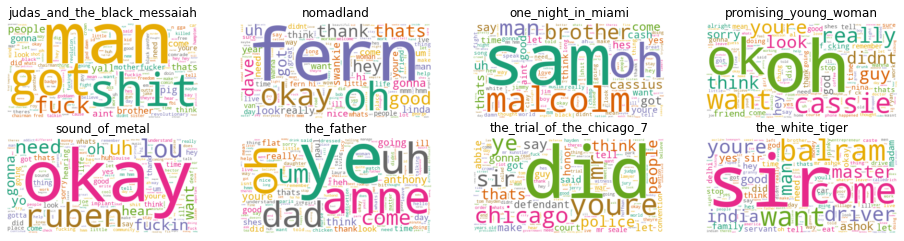

In [33]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

movie_name = movie_data.columns

# Create subplots for each movie
for index, movie in enumerate(movie_data.columns):
    
    wc.generate_from_text(movie_data_clean.transcript[movie])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(movie_name[index])
    
plt.show()

In [34]:

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for movie in movie_data.columns:
    uniques = movie_data[movie].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(movie_name, unique_list)), columns=['movie', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,movie,unique_words
5,the_father,876
4,sound_of_metal,882
3,promising_young_woman,1260
1,nomadland,1313
7,the_white_tiger,1708
0,judas_and_the_black_messaiah,1752
2,one_night_in_miami,1924
6,the_trial_of_the_chicago_7,2467


Text(0.5, 1.0, 'Number of Unique Words')

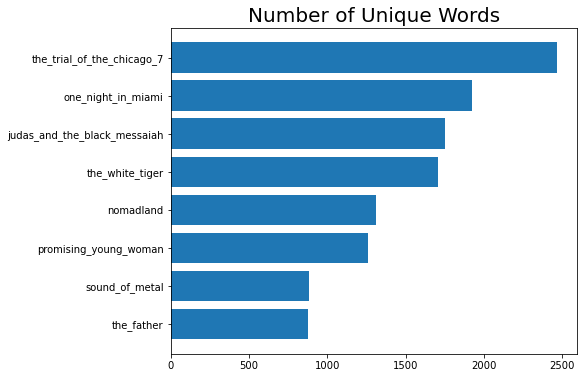

In [35]:
# Let's plot our findings
import numpy as np
unique_list = []
for movie in movie_data.columns:
    uniques = movie_data[movie].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(movie_name, unique_list)), columns=['movie', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort
y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.movie)
plt.title('Number of Unique Words', fontsize=20)

In [36]:
Counter(words).most_common(10)

[('know', 8),
 ('im', 8),
 ('dont', 8),
 ('just', 8),
 ('right', 6),
 ('yeah', 6),
 ('like', 6),
 ('oh', 5),
 ('youre', 4),
 ('gonna', 3)]

In [37]:
# Let's isolate just these bad words
data_bad_words = movie_data.transpose()[['fucking', 'fuck', 'fucked', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck + data_bad_words.fucked, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
judas_and_the_black_messaiah,68,59
nomadland,0,1
one_night_in_miami,16,25
promising_young_woman,0,7
sound_of_metal,22,11
the_father,2,1
the_trial_of_the_chicago_7,29,3
the_white_tiger,22,7


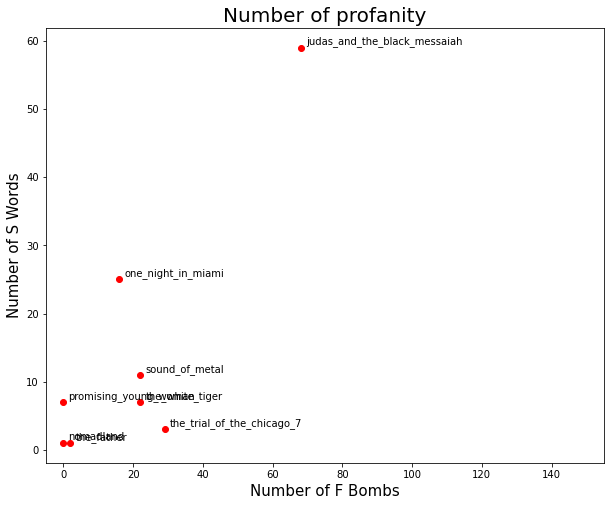

In [38]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, movie in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[movie]
    y = data_profanity.s_word.loc[movie]
    plt.scatter(x, y, color='red')
    plt.text(x+1.5, y+0.5, movie_name[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of profanity', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Sentiment Analysis

In [39]:
movie_data = pd.read_pickle('movie_corpus.pkl')
movie_data

,transcript
judas_and_the_black_messaiah,"judas and the black messiah depicts the events that led to the assassination of the -year-old black panther leader fred hampton on december , , wh..."
nomadland,"following the economic collapse of a company town in rural nevada, fern packs her van and sets off on the road exploring a life outside of conven..."
one_night_in_miami,"set on the night of february , , one night in miami follows a young, brash cassius clay as he emerges from the miami beach convention center the n..."
promising_young_woman,"cassie thomas lives with her parents and works at a coffee shop. she previously attended medical school, but dropped out after her friend nina was..."
sound_of_metal,"during a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer ruben begins to experience intermittent hearing loss. when a sp..."
the_father,anne visits her father anthony in his flat after he becomes belligerent with his recent caretaker. anthony is suffering from dementia and consta...
the_trial_of_the_chicago_7,"during the democratic national convention in chicago, there were massive demonstrations against the vietnam war, which was reaching its peak. whe..."
the_white_tiger,"balram halwai narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, ou..."


In [40]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

movie_data_df['polarity'] = movie_data_df['transcript'].apply(pol)
movie_data_df['subjectivity'] = movie_data_df['transcript'].apply(sub)
movie_data_df

,transcript,movie_name,polarity,subjectivity
judas_and_the_black_messaiah,"judas and the black messiah depicts the events that led to the assassination of the -year-old black panther leader fred hampton on december , , wh...",judas_and_the_black_messaiah,0.056134,0.509104
nomadland,"following the economic collapse of a company town in rural nevada, fern packs her van and sets off on the road exploring a life outside of conven...",nomadland,0.227986,0.537724
one_night_in_miami,"set on the night of february , , one night in miami follows a young, brash cassius clay as he emerges from the miami beach convention center the n...",one_night_in_miami,0.149657,0.516589
promising_young_woman,"cassie thomas lives with her parents and works at a coffee shop. she previously attended medical school, but dropped out after her friend nina was...",promising_young_woman,0.055615,0.573204
sound_of_metal,"during a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer ruben begins to experience intermittent hearing loss. when a sp...",sound_of_metal,0.133357,0.518927
the_father,anne visits her father anthony in his flat after he becomes belligerent with his recent caretaker. anthony is suffering from dementia and consta...,the_father,0.101099,0.547118
the_trial_of_the_chicago_7,"during the democratic national convention in chicago, there were massive demonstrations against the vietnam war, which was reaching its peak. whe...",the_trial_of_the_chicago_7,0.081583,0.469291
the_white_tiger,"balram halwai narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, ou...",the_white_tiger,0.102728,0.523536


Text(0, 0.5, '<-- Facts -------- Opinions -->')

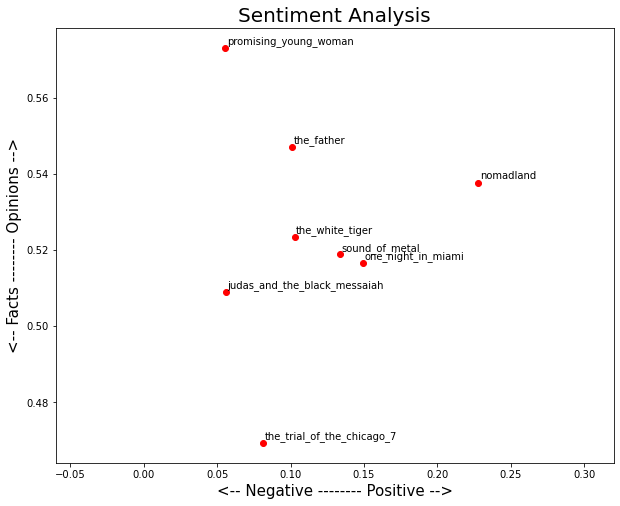

In [52]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, movie in enumerate(movie_data_df.index):
    x = movie_data_df.polarity.loc[movie]
    y = movie_data_df.subjectivity.loc[movie]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, movie_data_df['movie_name'][index], fontsize=10)
    plt.xlim(-.06, .32) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

In [60]:
### Sentiment over duration of movie
import numpy as np
import math

def split_text(text, n=50):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [61]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in movie_data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [62]:
# The list has 10 elements, one for each transcript
len(list_pieces)


8

In [63]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

50

In [64]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
#polarity_transcript

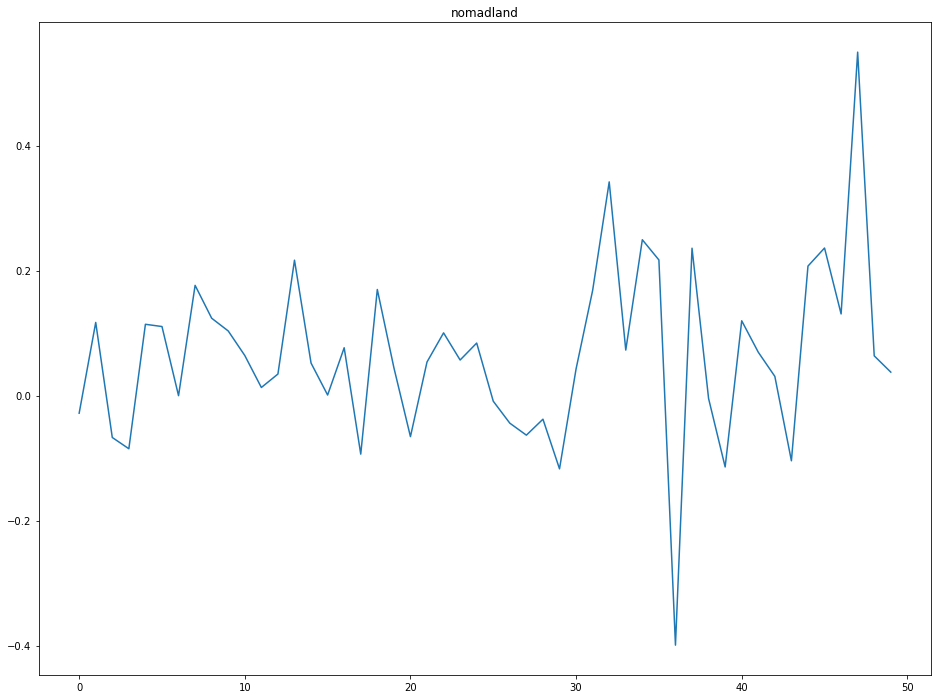

In [68]:
# Show the plot for one movie
plt.plot(polarity_transcript[0])
plt.title(movie_data_df['movie_name'].index[1])
plt.show()

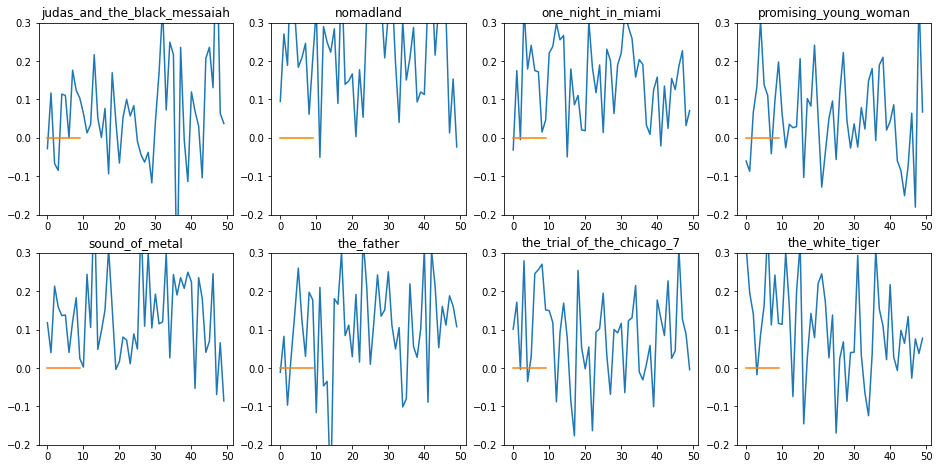

In [70]:
# Show the plot for all moviess
plt.rcParams['figure.figsize'] = [16, 12]

for index, movie in enumerate(movie_data_df.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(movie_data_df['movie_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

A nice comparison to make would be to compare these plots to past winners in the same category and then use that as a prediction baseline for the 2021 Oscars prediction for the category of Best Screen 

### Topic Modeling

In [71]:
# Load the DTM
import pandas as pd
import pickle

data = pd.read_pickle('movie_dtm_stop.pkl')
data

,aa,aaa,aah,abandon,abandoning,abbie,abbies,abbott,able,aboard,...,youth,youthe,youto,youve,youwhat,zero,zhao,zing,zip,zone
judas_and_the_black_messaiah,0,0,0,0,0,0,0,0,2,0,...,0,0,0,2,0,1,0,0,0,1
nomadland,2,1,0,0,0,0,0,0,5,1,...,0,0,0,2,0,0,1,0,1,0
one_night_in_miami,0,0,1,0,0,0,0,0,4,0,...,0,0,0,7,0,0,0,0,0,0
promising_young_woman,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,0,0,0,0,0,0
sound_of_metal,0,0,0,1,0,0,0,0,3,0,...,0,0,0,4,0,0,0,0,0,0
the_father,0,0,0,0,1,0,0,0,6,0,...,0,0,0,6,0,0,0,0,0,0
the_trial_of_the_chicago_7,0,0,0,0,0,37,2,1,3,0,...,2,1,2,8,1,0,0,1,0,0
the_white_tiger,0,0,0,0,0,0,0,0,1,0,...,0,0,0,7,0,0,0,0,0,0


In [72]:
from gensim import matutils, models
import scipy.sparse

In [73]:
movie_tdm = data.transpose()
movie_tdm.head()

,judas_and_the_black_messaiah,nomadland,one_night_in_miami,promising_young_woman,sound_of_metal,the_father,the_trial_of_the_chicago_7,the_white_tiger
aa,0,2,0,0,0,0,0,0
aaa,0,1,0,0,0,0,0,0
aah,0,0,1,0,0,0,0,0
abandon,0,0,0,0,1,0,0,0
abandoning,0,0,0,0,0,1,0,0


In [74]:
movie_sparse_counts = scipy.sparse.csr_matrix(movie_tdm)
movie_corpus = matutils.Sparse2Corpus(movie_sparse_counts)

In [75]:
movie_cv = pickle.load(open('movie_cv_stop.pkl', 'rb'))
movie_id2word = dict((v, k) for k, v in movie_cv.vocabulary_.items())

In [76]:
lda = models.LdaModel(corpus=movie_corpus, id2word=movie_id2word, num_topics=10, passes=10)
lda.print_topics()

[(0,
  '0.001*"fern" + 0.001*"oh" + 0.001*"okay" + 0.001*"gonna" + 0.001*"thats" + 0.000*"got" + 0.000*"man" + 0.000*"good" + 0.000*"come" + 0.000*"need"'),
 (1,
  '0.016*"oh" + 0.014*"yes" + 0.010*"youre" + 0.010*"think" + 0.010*"uh" + 0.010*"really" + 0.009*"anne" + 0.008*"come" + 0.008*"want" + 0.008*"um"'),
 (2,
  '0.086*"fern" + 0.013*"oh" + 0.012*"okay" + 0.011*"good" + 0.011*"thats" + 0.009*"hey" + 0.009*"hi" + 0.009*"dave" + 0.008*"got" + 0.008*"uh"'),
 (3,
  '0.001*"think" + 0.001*"oh" + 0.001*"man" + 0.001*"come" + 0.001*"yes" + 0.001*"sir" + 0.000*"hey" + 0.000*"gonna" + 0.000*"uh" + 0.000*"fern"'),
 (4,
  '0.040*"sir" + 0.009*"come" + 0.009*"balram" + 0.008*"ashok" + 0.008*"yes" + 0.007*"youre" + 0.007*"want" + 0.006*"madam" + 0.006*"good" + 0.006*"man"'),
 (5,
  '0.001*"okay" + 0.001*"fern" + 0.001*"oh" + 0.001*"uh" + 0.000*"man" + 0.000*"gonna" + 0.000*"ruben" + 0.000*"yes" + 0.000*"come" + 0.000*"youre"'),
 (6,
  '0.001*"sir" + 0.000*"did" + 0.000*"come" + 0.000*"man" + 

In [103]:
from nltk import word_tokenize, pos_tag

def nouns(text):
    is_noun = lambda pos: pos[:] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [92]:
movie_data_clean = pd.read_pickle('movie_data_clean.pkl')
movie_data_clean

,transcript
judas_and_the_black_messaiah,"judas and the black messiah depicts the events that led to the assassination of the -year-old black panther leader fred hampton on december , , wh..."
nomadland,"following the economic collapse of a company town in rural nevada, fern packs her van and sets off on the road exploring a life outside of conven..."
one_night_in_miami,"set on the night of february , , one night in miami follows a young, brash cassius clay as he emerges from the miami beach convention center the n..."
promising_young_woman,"cassie thomas lives with her parents and works at a coffee shop. she previously attended medical school, but dropped out after her friend nina was..."
sound_of_metal,"during a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer ruben begins to experience intermittent hearing loss. when a sp..."
the_father,anne visits her father anthony in his flat after he becomes belligerent with his recent caretaker. anthony is suffering from dementia and consta...
the_trial_of_the_chicago_7,"during the democratic national convention in chicago, there were massive demonstrations against the vietnam war, which was reaching its peak. whe..."
the_white_tiger,"balram halwai narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, ou..."


In [175]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [104]:
data_nouns = pd.DataFrame(movie_data_clean.transcript.apply(nouns))
data_nouns

,transcript
judas_and_the_black_messaiah,judas messiah assassination panther leader hampton december chicago police apartment shot bed panther leader mark clark bonus bit prize march bill...
nomadland,collapse company town nevada van road life society nomad feature film director chloé zhao nomadland linda swankie bob exploration landscape west j...
one_night_in_miami,night night miami cassius clay miami beach convention heavyweight champion world liston world crowds beach match clay island jim crow-era segregat...
promising_young_woman,cassie thomas coffee shop school friend nina nobody suicide weekend cassie time man home advantage her behavior notebook classmate cooper coffee s...
sound_of_metal,series drummer ruben hearing loss specialist condition music career — life — bandmate lou heroin addict sober house deaf relapse situation communi...
the_father,anne father anthony belligerent caretaker anthony dementia life watch fact place day caretaker watch anne london boyfriend anthony anne day anthon...
the_trial_of_the_chicago_7,convention chicago war peak curfew police riot conspiracy story trial i today division strength fighting draft call december president johnson dra...
the_white_tiger,balram halwai epic rise villager entrepreneur india cunning hero way driver ashok pinky america society thing – night betrayal verge everything sy...


In [105]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.transcript)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index
data_dtmn

,aaa,aah,abbie,aboard,abuse,academy,access,accident,accusation,ace,...,yoke,york,youd,youll,youngblood,youto,youve,zhao,zip,zone
judas_and_the_black_messaiah,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
nomadland,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,1,1,0
one_night_in_miami,0,1,0,0,0,0,0,0,0,1,...,0,2,0,1,1,0,3,0,0,0
promising_young_woman,0,0,0,0,0,0,0,4,1,0,...,0,1,0,1,0,0,0,0,0,0
sound_of_metal,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
the_father,0,0,0,0,0,0,0,4,0,0,...,0,0,3,4,0,0,4,0,0,0
the_trial_of_the_chicago_7,0,0,17,0,0,1,1,0,0,0,...,0,0,1,2,0,1,2,0,0,0
the_white_tiger,0,0,0,0,1,0,0,1,0,0,...,0,5,0,4,0,0,5,0,0,0


In [106]:
# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [107]:
# Let's start with 2 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=2, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.016*"okay" + 0.015*"man" + 0.015*"hey" + 0.009*"fern" + 0.008*"gon" + 0.008*"shit" + 0.008*"fuck" + 0.007*"hi" + 0.007*"thank" + 0.007*"hmm"'),
 (1,
  '0.018*"sir" + 0.014*"man" + 0.010*"hey" + 0.010*"sam" + 0.008*"malcolm" + 0.007*"cassius" + 0.006*"mr" + 0.006*"brother" + 0.005*"way" + 0.005*"world"')]

In [108]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=3, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.013*"hey" + 0.010*"fern" + 0.009*"okay" + 0.007*"mr" + 0.007*"thank" + 0.007*"police" + 0.006*"man" + 0.006*"hi" + 0.006*"gon" + 0.006*"sorry"'),
 (1,
  '0.026*"man" + 0.021*"sir" + 0.014*"hey" + 0.013*"sam" + 0.011*"brother" + 0.011*"malcolm" + 0.009*"cassius" + 0.009*"shit" + 0.007*"fuck" + 0.007*"way"'),
 (2,
  '0.022*"okay" + 0.015*"ruben" + 0.013*"anne" + 0.013*"dad" + 0.011*"lou" + 0.011*"anthony" + 0.008*"day" + 0.008*"heh" + 0.008*"ah" + 0.007*"sorry"')]

In [109]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=4, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.020*"sir" + 0.018*"hey" + 0.017*"man" + 0.009*"okay" + 0.009*"fern" + 0.007*"shit" + 0.007*"look" + 0.007*"god" + 0.007*"fuck" + 0.006*"gon"'),
 (1,
  '0.014*"mr" + 0.012*"police" + 0.009*"sir" + 0.009*"hayden" + 0.008*"honor" + 0.008*"court" + 0.007*"tom" + 0.007*"war" + 0.007*"convention" + 0.007*"trial"'),
 (2,
  '0.029*"sam" + 0.027*"man" + 0.023*"malcolm" + 0.020*"cassius" + 0.015*"brother" + 0.012*"cash" + 0.011*"hey" + 0.009*"mm" + 0.009*"jimmy" + 0.008*"jim"'),
 (3,
  '0.024*"okay" + 0.017*"ruben" + 0.015*"anne" + 0.014*"dad" + 0.012*"lou" + 0.012*"anthony" + 0.009*"day" + 0.009*"heh" + 0.008*"ah" + 0.008*"thank"')]

In [110]:
# Let's try 4 topics
ldan = models.LdaModel(corpus=corpusn, num_topics=6, id2word=id2wordn, passes=10)
ldan.print_topics()

[(0,
  '0.028*"man" + 0.016*"sam" + 0.014*"hey" + 0.013*"malcolm" + 0.012*"brother" + 0.011*"cassius" + 0.011*"shit" + 0.009*"fuck" + 0.007*"mm" + 0.007*"chairman"'),
 (1,
  '0.015*"mr" + 0.013*"police" + 0.010*"sir" + 0.009*"hayden" + 0.009*"honor" + 0.008*"court" + 0.008*"tom" + 0.007*"war" + 0.007*"convention" + 0.007*"trial"'),
 (2,
  '0.001*"sir" + 0.001*"man" + 0.001*"mr" + 0.001*"hey" + 0.001*"police" + 0.001*"okay" + 0.001*"convention" + 0.001*"court" + 0.001*"park" + 0.001*"trial"'),
 (3,
  '0.061*"sir" + 0.016*"balram" + 0.012*"man" + 0.011*"driver" + 0.011*"ashok" + 0.010*"family" + 0.010*"madam" + 0.010*"india" + 0.009*"hey" + 0.008*"car"'),
 (4,
  '0.020*"cassie" + 0.015*"god" + 0.014*"hey" + 0.013*"sorry" + 0.010*"look" + 0.009*"coffee" + 0.009*"ok" + 0.008*"al" + 0.008*"friend" + 0.008*"room"'),
 (5,
  '0.034*"okay" + 0.022*"fern" + 0.018*"hey" + 0.016*"hi" + 0.015*"ruben" + 0.011*"lou" + 0.011*"thank" + 0.010*"gon" + 0.010*"hmm" + 0.009*"swankie"')]

In [113]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:] == 'NN' or pos[:] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

### Topic Modeling - Attempt #3 (Nouns and Adjectives)

In [114]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

In [116]:
# Apply the nouns function to the transcripts to filter only on nouns
data_nouns_adj = pd.DataFrame(movie_data_clean.transcript.apply(nouns_adj))
data_nouns_adj

,transcript
judas_and_the_black_messaiah,judas black messiah events assassination -year-old black panther leader hampton december chicago police hamptons apartment shot bed fellow black p...
nomadland,economic collapse company town rural nevada fern van sets road life conventional society modern-day nomad third feature film director chloé zhao n...
one_night_in_miami,night february night miami young brash cassius clay miami beach convention new heavyweight champion world odds sonny liston sports world crowds pe...
promising_young_woman,cassie thomas parents coffee shop medical school friend nina nobody suicide weekend cassie bars pretends time man home tries advantage her behavio...
sound_of_metal,series adrenaline-fueled one-night gigs itinerant punk-metal drummer ruben intermittent hearing loss specialist condition music career — life — ba...
the_father,anne father anthony flat belligerent recent caretaker anthony dementia forgets important life events things flat watch fact same place day recent ...
the_trial_of_the_chicago_7,democratic national convention chicago massive demonstrations vietnam war peak curfew further protests police riot demonstrators conspiracy story ...
the_white_tiger,balram halwai epic humorous rise poor villager successful entrepreneur modern india cunning ambitious young hero jockeys way driver ashok pinky am...


In [117]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(stop_words=stop_words, max_df=.8)
data_cvna = cvna.fit_transform(data_nouns_adj.transcript)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index
data_dtmna

,aa,aaa,aah,abbie,abbies,abbott,aboard,abuse,academy,access,...,youd,youll,youngblood,younger,youngest,youth,youto,zhao,zip,zone
judas_and_the_black_messaiah,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
nomadland,1,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,1,0
one_night_in_miami,0,0,1,0,0,0,0,0,0,0,...,1,4,1,1,1,0,0,0,0,0
promising_young_woman,0,0,0,0,0,0,0,0,0,0,...,9,2,0,0,0,0,0,0,0,0
sound_of_metal,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
the_father,0,0,0,0,0,0,0,0,0,0,...,3,6,0,1,0,0,0,0,0,0
the_trial_of_the_chicago_7,0,0,0,26,2,1,0,0,2,1,...,2,4,0,0,0,2,1,0,0,0
the_white_tiger,0,0,0,0,0,0,0,1,0,0,...,1,11,0,1,1,0,0,0,0,0


In [118]:
# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [119]:
# Let's start with 2 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=2, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.033*"fern" + 0.017*"sir" + 0.009*"sam" + 0.007*"malcolm" + 0.006*"cassius" + 0.005*"brother" + 0.004*"white" + 0.004*"dad" + 0.004*"anne" + 0.004*"balram"'),
 (1,
  '0.010*"mr" + 0.007*"fuck" + 0.006*"police" + 0.005*"sir" + 0.005*"black" + 0.005*"chairman" + 0.005*"ruben" + 0.005*"fuckin" + 0.005*"pigs" + 0.004*"tom"')]

In [120]:
# Let's try 3 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=3, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.038*"fern" + 0.011*"sam" + 0.010*"mr" + 0.008*"malcolm" + 0.008*"cassius" + 0.005*"brother" + 0.005*"police" + 0.005*"sir" + 0.005*"white" + 0.004*"black"'),
 (1,
  '0.040*"sir" + 0.010*"ruben" + 0.009*"balram" + 0.008*"lou" + 0.008*"ashok" + 0.006*"driver" + 0.006*"madam" + 0.005*"family" + 0.005*"india" + 0.004*"master"'),
 (2,
  '0.008*"fuck" + 0.007*"chairman" + 0.007*"anne" + 0.006*"dad" + 0.006*"black" + 0.006*"cassie" + 0.006*"anthony" + 0.005*"pigs" + 0.005*"flat" + 0.005*"daughter"')]

In [121]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=10)
ldana.print_topics()

[(0,
  '0.059*"fern" + 0.008*"fuck" + 0.007*"chairman" + 0.007*"anne" + 0.007*"dad" + 0.006*"black" + 0.006*"anthony" + 0.005*"pigs" + 0.005*"flat" + 0.004*"swankie"'),
 (1,
  '0.021*"sam" + 0.017*"malcolm" + 0.015*"cassius" + 0.011*"brother" + 0.010*"ruben" + 0.009*"mm" + 0.009*"cash" + 0.008*"lou" + 0.007*"white" + 0.006*"jimmy"'),
 (2,
  '0.019*"mr" + 0.010*"police" + 0.009*"sir" + 0.008*"tom" + 0.008*"hayden" + 0.006*"seale" + 0.006*"honor" + 0.006*"chicago" + 0.006*"court" + 0.005*"abbie"'),
 (3,
  '0.040*"sir" + 0.009*"balram" + 0.008*"cassie" + 0.008*"ashok" + 0.006*"ok" + 0.006*"madam" + 0.006*"driver" + 0.005*"family" + 0.005*"india" + 0.004*"master"')]

### Identify Topics in Each Document

In [123]:
# Our final LDA model (for now)
ldana = models.LdaModel(corpus=corpusna, num_topics=4, id2word=id2wordna, passes=80)
ldana.print_topics()

[(0,
  '0.015*"cassie" + 0.012*"ok" + 0.007*"al" + 0.007*"coffee" + 0.007*"guys" + 0.006*"ryan" + 0.006*"friend" + 0.006*"nina" + 0.005*"alright" + 0.005*"ck"'),
 (1,
  '0.061*"fern" + 0.009*"fuck" + 0.008*"ruben" + 0.007*"chairman" + 0.006*"black" + 0.006*"fuckin" + 0.006*"lou" + 0.005*"pigs" + 0.004*"yall" + 0.004*"swankie"'),
 (2,
  '0.031*"sir" + 0.016*"sam" + 0.013*"malcolm" + 0.012*"cassius" + 0.010*"brother" + 0.007*"balram" + 0.007*"cash" + 0.007*"white" + 0.006*"ashok" + 0.006*"mm"'),
 (3,
  '0.016*"mr" + 0.008*"police" + 0.007*"anne" + 0.007*"sir" + 0.007*"tom" + 0.007*"dad" + 0.006*"hayden" + 0.006*"anthony" + 0.005*"seale" + 0.005*"honor"')]

In [124]:
# Let's take a look at which topics each transcript contains
corpus_transformed = ldana[corpusna]
list(zip([a for [(a,b)] in corpus_transformed], data_dtmna.index))

[(1, 'judas_and_the_black_messaiah'),
 (1, 'nomadland'),
 (2, 'one_night_in_miami'),
 (0, 'promising_young_woman'),
 (1, 'sound_of_metal'),
 (3, 'the_father'),
 (3, 'the_trial_of_the_chicago_7'),
 (2, 'the_white_tiger')]

### Text Generation

In [126]:
# Read in the corpus, including punctuation!
data = pd.read_pickle('movie_corpus.pkl')
data

,transcript
judas_and_the_black_messaiah,"judas and the black messiah depicts the events that led to the assassination of the -year-old black panther leader fred hampton on december , , wh..."
nomadland,"following the economic collapse of a company town in rural nevada, fern packs her van and sets off on the road exploring a life outside of conven..."
one_night_in_miami,"set on the night of february , , one night in miami follows a young, brash cassius clay as he emerges from the miami beach convention center the n..."
promising_young_woman,"cassie thomas lives with her parents and works at a coffee shop. she previously attended medical school, but dropped out after her friend nina was..."
sound_of_metal,"during a series of adrenaline-fueled one-night gigs, itinerant punk-metal drummer ruben begins to experience intermittent hearing loss. when a sp..."
the_father,anne visits her father anthony in his flat after he becomes belligerent with his recent caretaker. anthony is suffering from dementia and consta...
the_trial_of_the_chicago_7,"during the democratic national convention in chicago, there were massive demonstrations against the vietnam war, which was reaching its peak. whe..."
the_white_tiger,"balram halwai narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, ou..."


In [160]:
# Extract only Ali Wong's text
the_white_tiger_text = data.transcript.loc['the_white_tiger']
the_white_tiger_text[:200]

'balram halwai  narrates his epic and darkly humorous rise from poor villager to successful entrepreneur in modern india. cunning and ambitious, our young hero jockeys his way into becoming a driver fo'

### Markov Chain

In [161]:
from collections import defaultdict

def markov_chain(text):
    '''The input is a string of text and the output will be a dictionary with each word as
       a key and each value as the list of words that come after the key in the text.'''
    
    # Tokenize the text by word, though including punctuation
    words = text.split(' ')
    
    # Initialize a default dictionary to hold all of the words and next words
    m_dict = defaultdict(list)
    
    # Create a zipped list of all of the word pairs and put them in word: list of next words format
    for current_word, next_word in zip(words[0:-1], words[1:]):
        m_dict[current_word].append(next_word)

    # Convert the default dict back into a dictionary
    m_dict = dict(m_dict)
    return m_dict

In [168]:
# Create the dictionary for Ali's routine, take a look at it
the_white_tiger_text_dict = markov_chain(the_white_tiger_text)
#the_white_tiger_text_dict

### Text Generation

In [174]:
import random

def generate_sentence(chain, count=150):
    '''Input a dictionary in the format of key = current word, value = list of next words
       along with the number of words you would like to see in your generated sentence.'''

    # Capitalize the first word
    word1 = random.choice(list(chain.keys()))
    sentence = word1.capitalize()

    # Generate the second word from the value list. Set the new word as the first word. Repeat.
    for i in range(count-1):
        word2 = random.choice(chain[word1])
        word1 = word2
        sentence += ' ' + word2

    # End it with a period
    sentence += '.'
    return(sentence)

In [179]:
generate_sentence(the_white_tiger_text_dict)

'Isnt here, to start off my brother ashok sir? if we live in america. society has to call– calm down.  nice and left you could spit his pants. im done. im gonna move. holy of the competition?  look at heart, after a generation? the mosques there?     once in india in paradise ♪ happy birthday ♪ ♪ unisex, the old days, i find something off and an india better than yours.  and get out. dont want to your country mouse, you afterwards. keep reading.  i can touch the car and earn in you.   low caste, sir.  does he came to my obligations to give a servant for the village hairy? the temple we have three. and he touched your confession and we great fun!  on their driver for the olympics. sometimes i dont tell you, uncle? and dont say.'